In [1]:
import os
import numpy as np
import pandas as pd
from numpy import cov
import seaborn as sns
import matplotlib.colors as mc
import matplotlib.pyplot as plt

# Hsap CLIP after MACS

In [2]:
dfStatBS = pd.read_csv('/home/anais/Documents/Projet/G4RBPevo/dfStatBS_Hsap_resBeforeMergeSp.csv', sep=',')
dfStatBS

RBP    NbBS cellLine  NbBSG4  NbG4binded  NbG4tot    RatioBS  \
0      AARS    3621     K562   775.0      1014.0    31299  21.402927   
1      AATF   13451     K562  3391.0      4238.0    53156  25.210022   
2     ABCF1    4890     K562   951.0      1102.0    24799  19.447853   
3     AGGF1   17266    HepG2  1690.0      2013.0    72692   9.788023   
4     AGGF1   38507     K562  3950.0      4751.0   107493  10.257875   
..      ...     ...      ...     ...         ...      ...        ...   
212   ZC3H8     360     K562    29.0        28.0     2647   8.055556   
213  ZNF622  107312     K562  7778.0      8908.0   129200   7.248024   
214  ZNF800   70049    HepG2  5182.0      5942.0   117767   7.397679   
215  ZNF800   51348     K562  5079.0      5978.0   102002   9.891330   
216  ZRANB2   19143     K562  4505.0      5546.0    69482  23.533406   

      RatioG4 ColorKnownRBPBindingG4  
0    3.239720                  black  
1    7.972759                  black  
2    4.443728                  black  
3    2.769218                  black  
4    4.419823                  black  
..        ...                    ...  
212  1.057801                  black  
213  6.894737                  black  
214  5.045556                  black  
215  5.860669                  black  
216  7.981923                  black  

[217 rows x 9 columns]

In [3]:
#### TMP: just to check helicase RBP
dfHel = pd.read_csv('/home/anais/Documents/Projet/G4RBPevo/data/RBPs_All_Species/HelicasesDF.csv', sep='\t')
list(set(dfHel['Gene_Name']) & set(dfStatBS['RBP']))

['XRCC6',
 'DDX51',
 'DDX3X',
 'WRN',
 'SUPV3L1',
 'DDX6',
 'DDX55',
 'HLTF',
 'DDX52',
 'DDX59',
 'DDX42',
 'UPF1',
 'G3BP1',
 'DDX21',
 'DHX30',
 'DDX24',
 'AQR']

----------------HepG2----------------


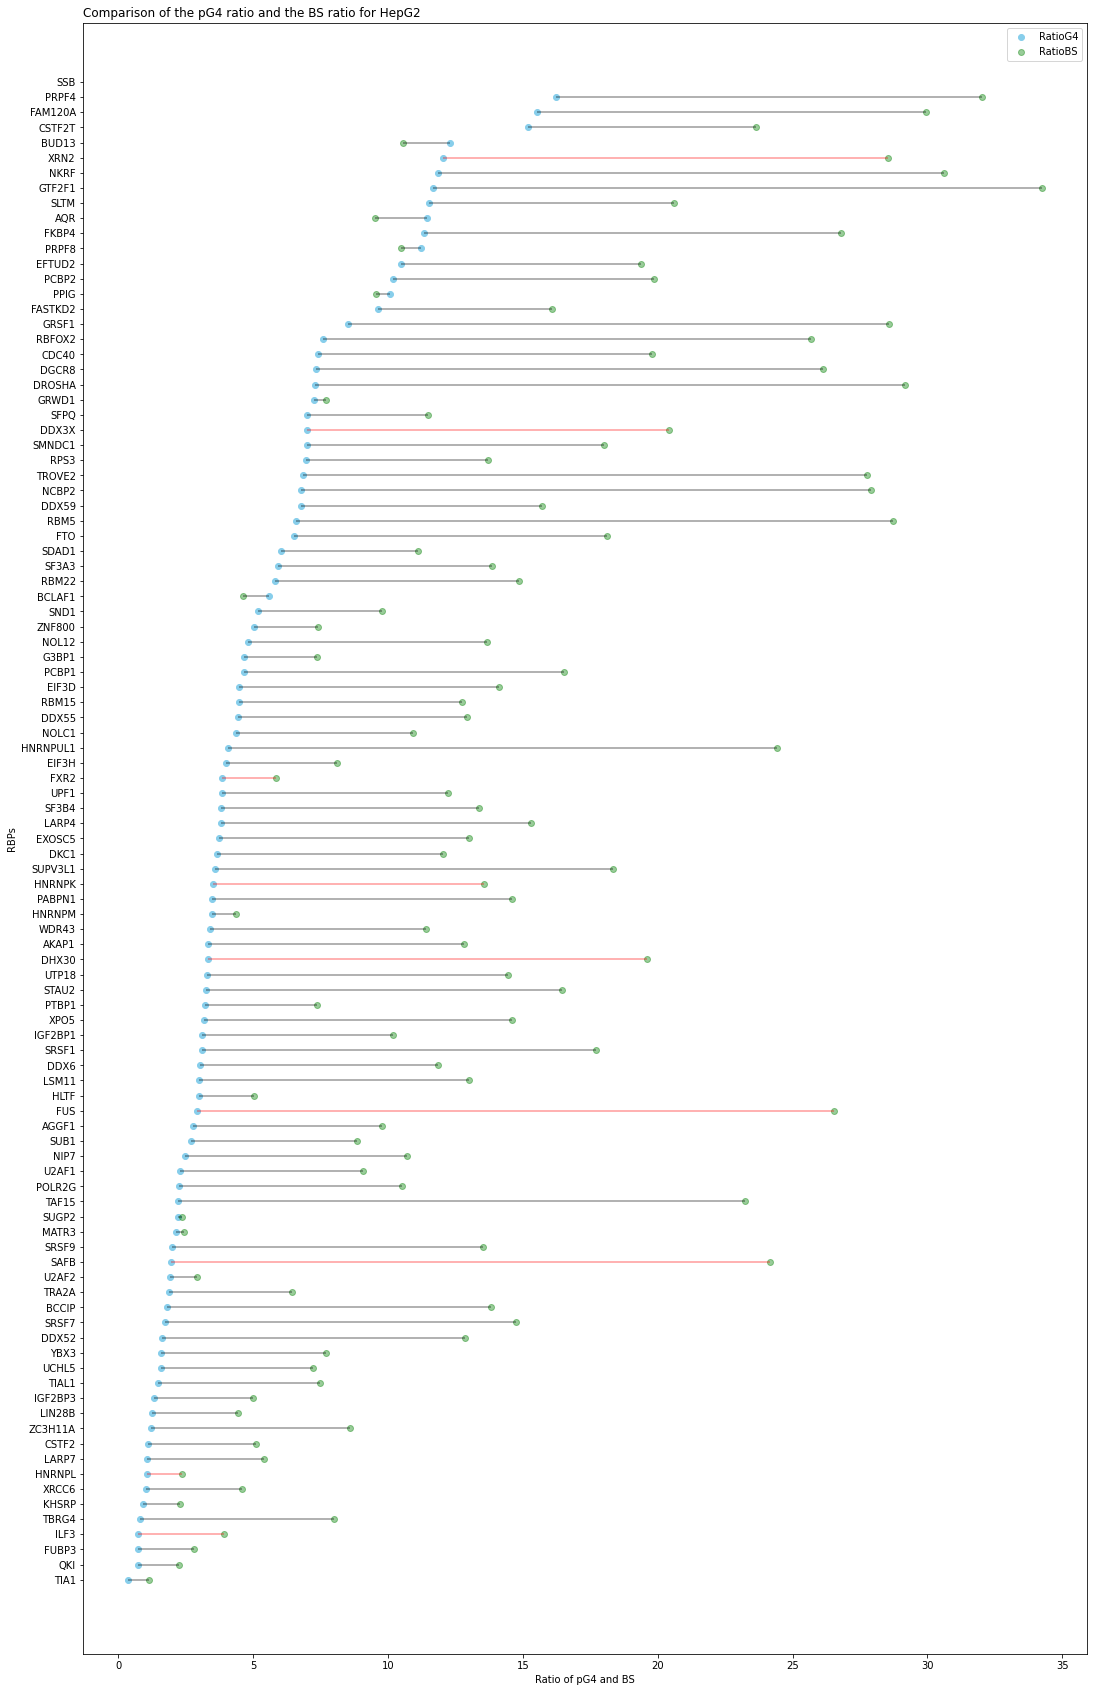

----------------K562----------------


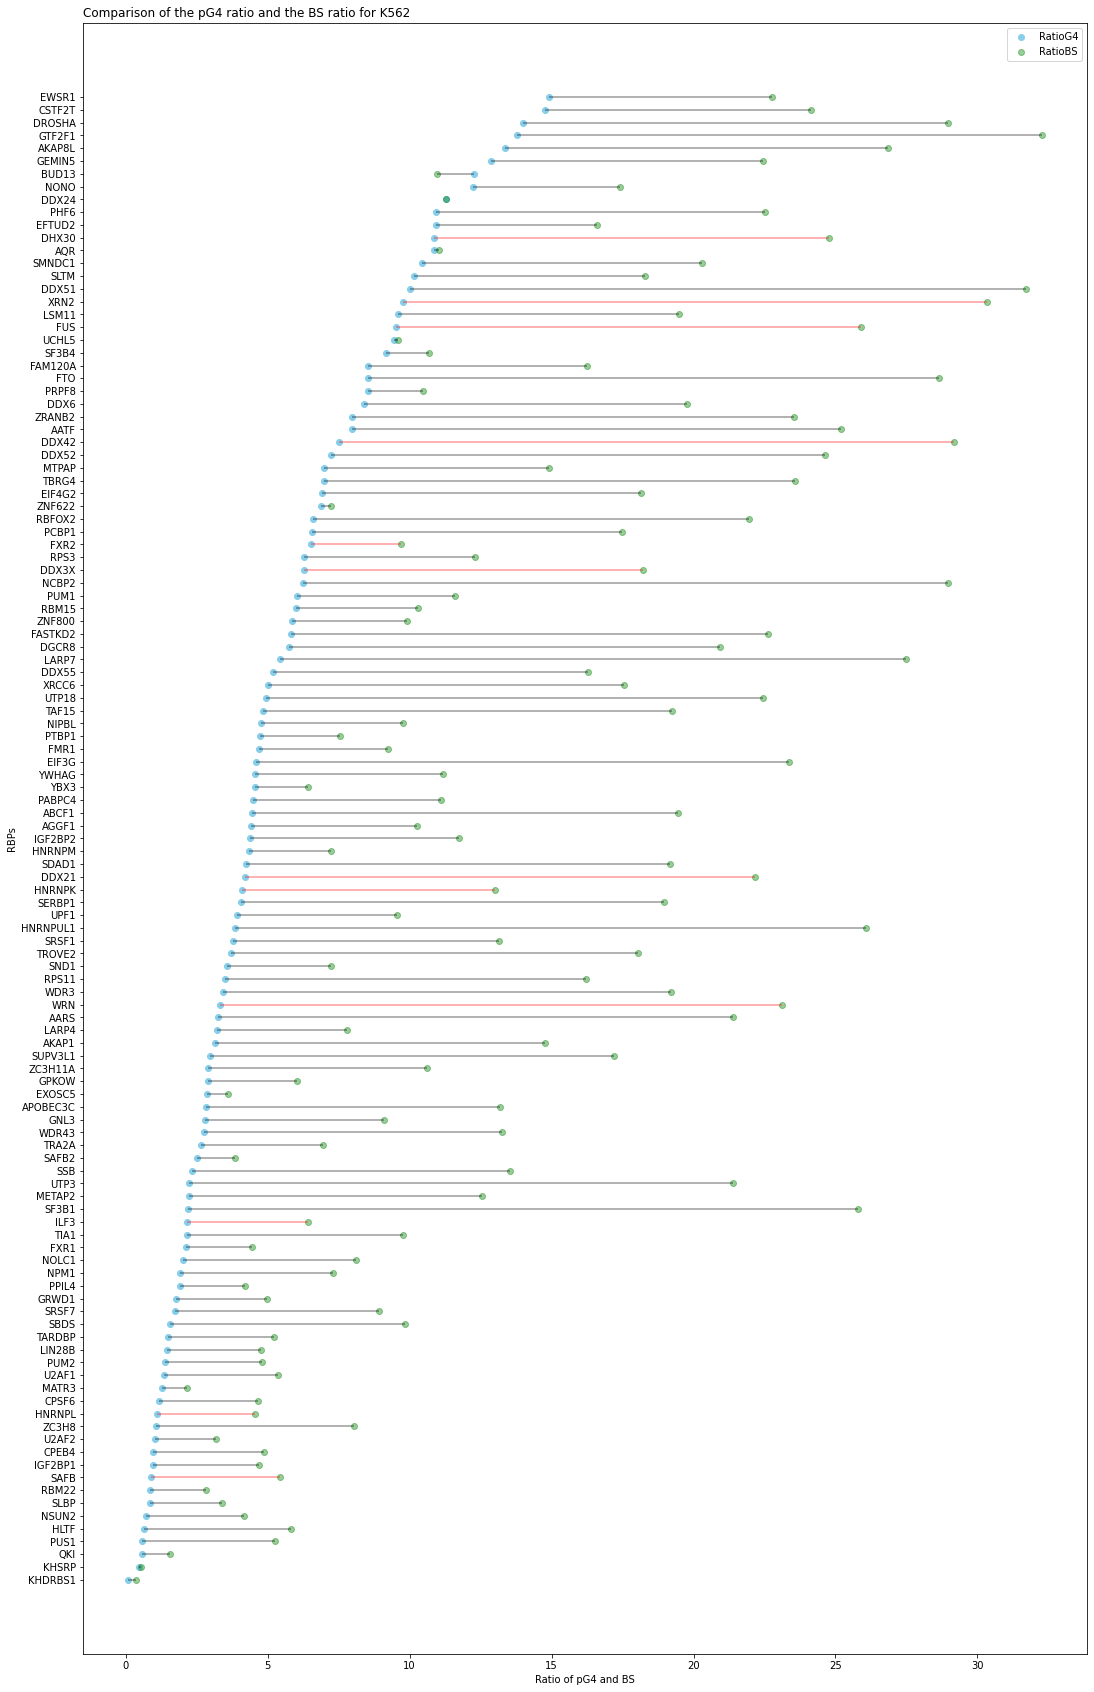

In [4]:
groupsRBP = dfStatBS.groupby(['cellLine'])
for name, groupRBP in groupsRBP:
    print('----------------'+name+'----------------')
    
    plt.figure(figsize=(18, 30))
    
    ordered_df = groupRBP.sort_values(by='RatioG4')
    my_range=range(1,len(groupRBP.index)+1)
    # The horizontal plot is made using the hline function
    plt.hlines(y=my_range, xmin=ordered_df['RatioG4'], xmax=ordered_df['RatioBS'], color=ordered_df['ColorKnownRBPBindingG4'], alpha=0.4)
    #plt.hlines(y=my_range2, xmin=ordered_df[ordered_df.ColorKnownRBPBindingG4 == 1]['RatioG4'], xmax=ordered_df[ordered_df.ColorKnownRBPBindingG4 == 1]['RatioBS'], color='black', alpha=0.4)
    plt.scatter(ordered_df['RatioG4'], my_range, color='skyblue', alpha=1, label='RatioG4')
    plt.scatter(ordered_df['RatioBS'], my_range, color='green', alpha=0.4 , label='RatioBS')
    plt.legend()
    # Add title and axis names
    plt.yticks(my_range, ordered_df['RBP'])
    plt.title("Comparison of the pG4 ratio and the BS ratio for "+name, loc='left')
    plt.xlabel('Ratio of pG4 and BS')
    plt.ylabel('RBPs')
    # Show the graph
    plt.savefig("/home/anais/Pictures/Article3/RBP/DoubleLolipopPlot_"+name+".svg")
    plt.show()

In [5]:
dfStatBSRandom = pd.DataFrame()
for repro in [1,2,3,4,5,6,7,8,9,10]:
    dfTmp = pd.read_csv('/home/anais/Documents/Projet/G4RBPevo/Repro_'+str(repro)+'_dfStatBS_Hsap_resBeforeMergeSp.csv', sep=',')
    dfTmp['Repro'] = repro
    dfStatBSRandom = pd.concat([dfStatBSRandom, dfTmp])

dicoAvrShuffle = {'cellLine': [], 'RBP': [], 'AvrRatioG4': [], 'StdRatioG4': [], 'AvrRatioBs': [], 'StdRatioBs': [], }
groupsRBP = dfStatBSRandom.groupby(['cellLine', 'RBP'])
for name, groupRBP in groupsRBP:
    dicoAvrShuffle['cellLine'].append(name[0])
    dicoAvrShuffle['RBP'].append(name[1])
    dicoAvrShuffle['AvrRatioG4'].append(groupRBP['RatioG4'].mean())
    dicoAvrShuffle['StdRatioG4'].append(groupRBP['RatioG4'].std())
    dicoAvrShuffle['AvrRatioBs'].append(groupRBP['RatioBS'].mean())
    dicoAvrShuffle['StdRatioBs'].append(groupRBP['RatioBS'].std())
    
dfStatRandom = pd.DataFrame(data=dicoAvrShuffle)
dfStatRandom

cellLine      RBP  AvrRatioG4  StdRatioG4  AvrRatioBs  StdRatioBs
0      HepG2    AGGF1    1.946275    0.015346   16.782115    0.152728
1      HepG2    AKAP1    2.906848    0.033116   24.536089    0.248386
2      HepG2      AQR   10.196385    0.031033   24.050942    0.089774
3      HepG2    BCCIP    0.637150    0.039862   10.376766    0.713475
4      HepG2   BCLAF1    8.449050    0.027165   20.516837    0.046937
..       ...      ...         ...         ...         ...         ...
212     K562  ZC3H11A    2.091662    0.019674   24.466169    0.242726
213     K562    ZC3H8    2.175204    0.076143   34.361111    0.962696
214     K562   ZNF622    7.199086    0.033256   22.678265    0.090590
215     K562   ZNF800    5.349740    0.028679   25.658448    0.151378
216     K562   ZRANB2    3.424628    0.012392   25.092723    0.130753

[217 rows x 6 columns]

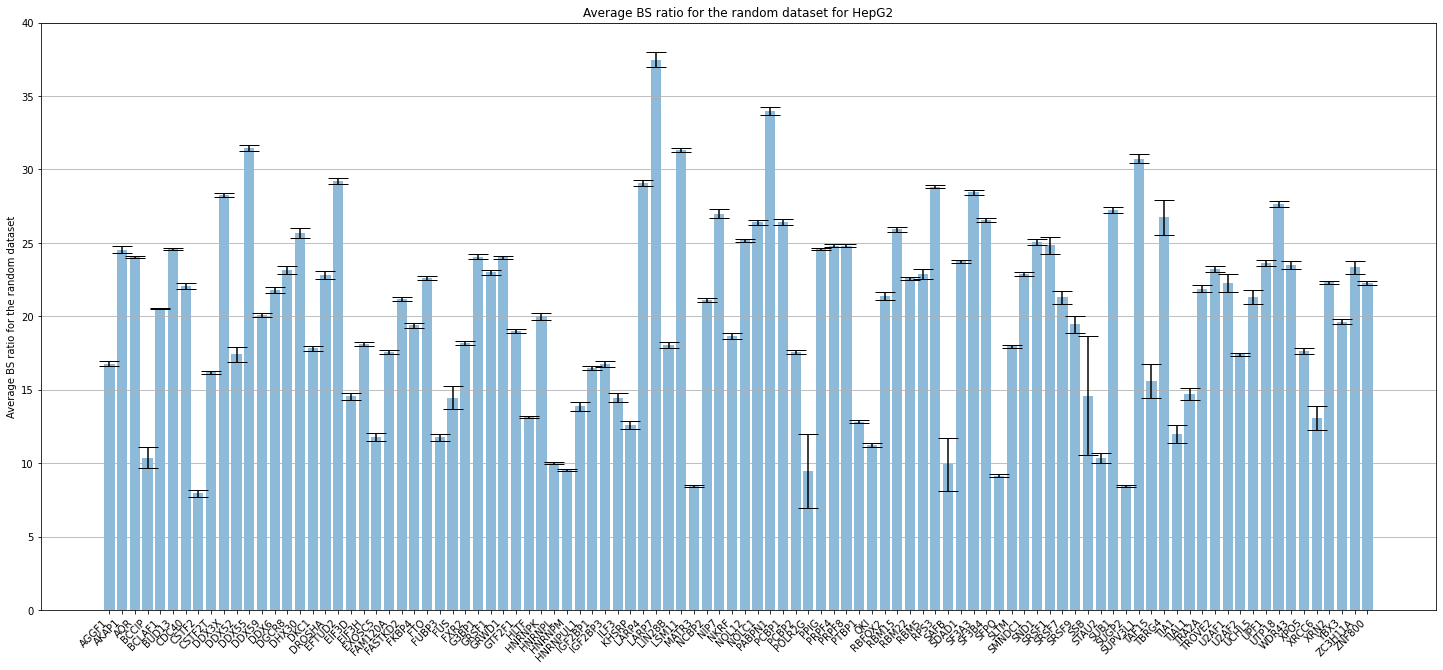

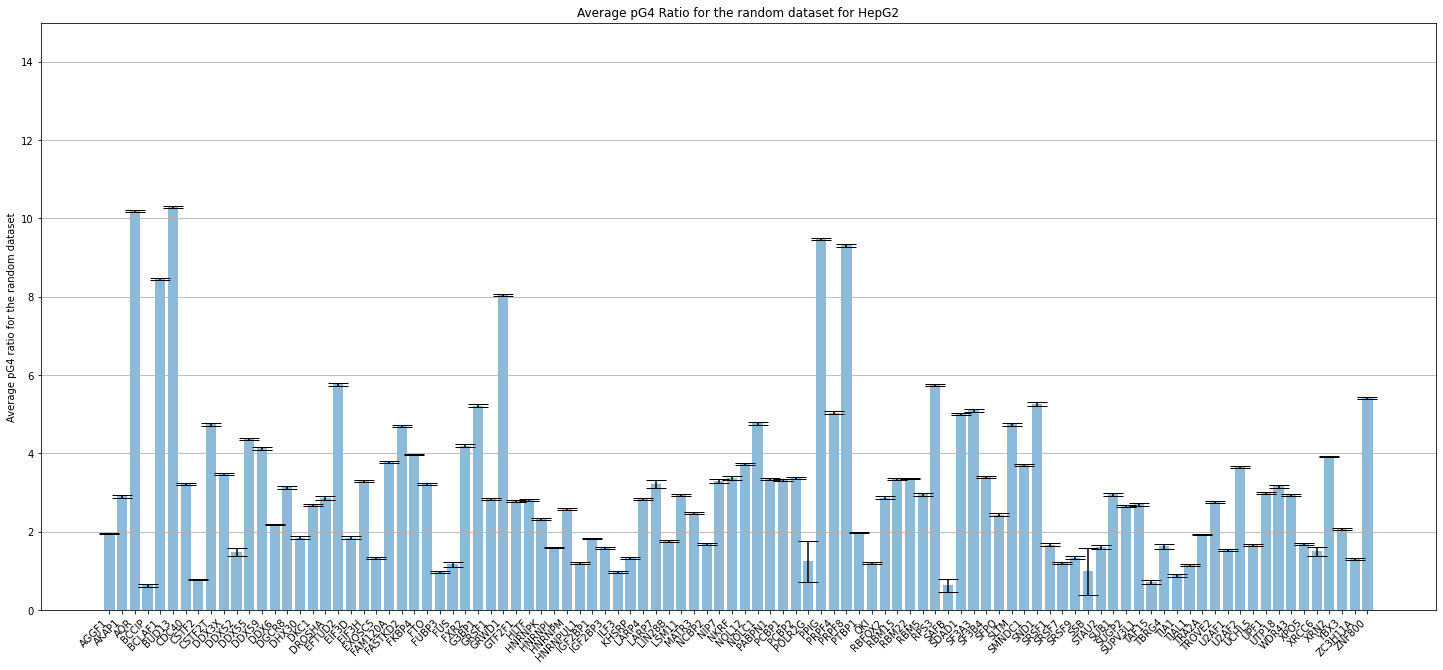

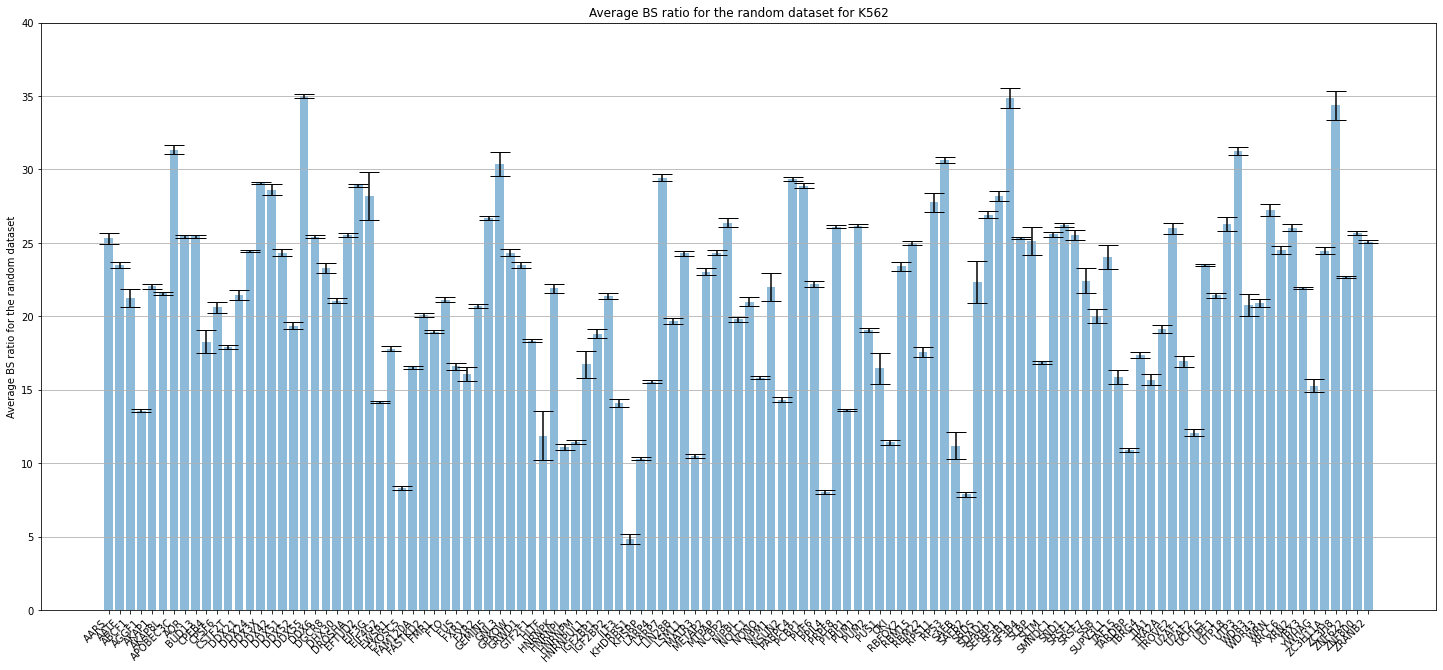

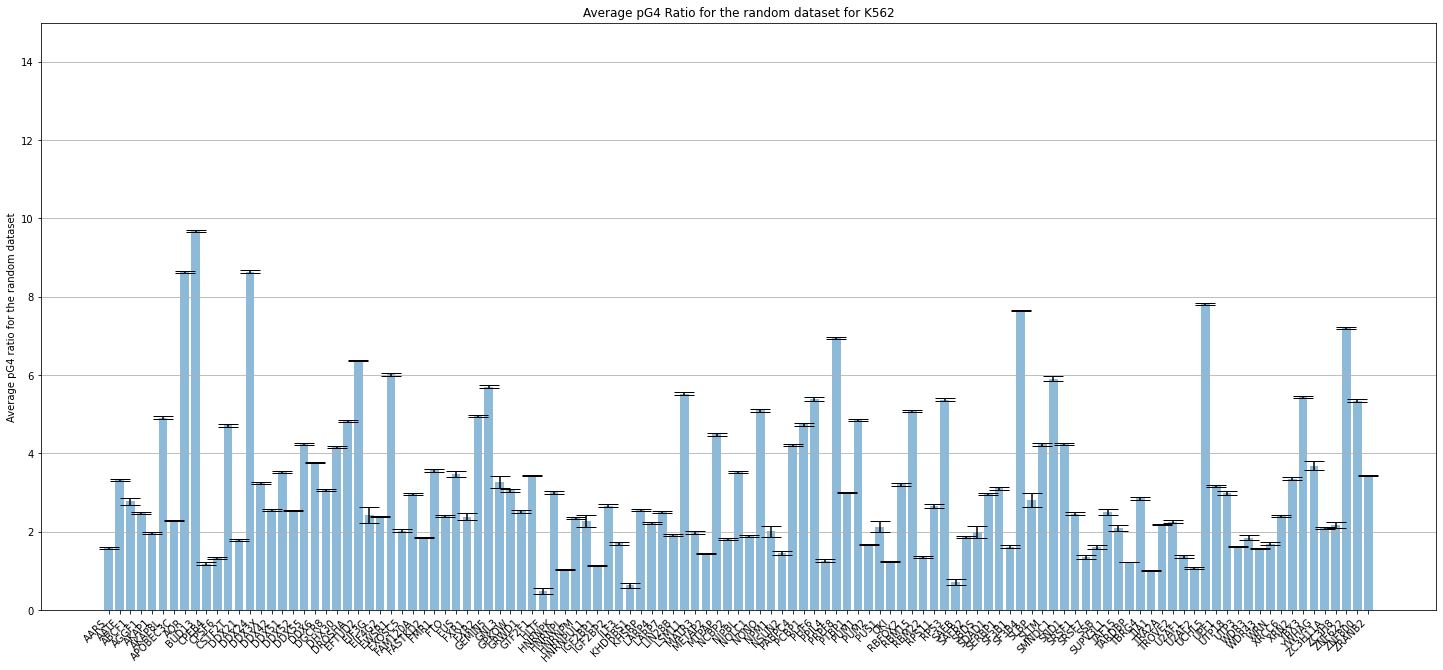

In [6]:
groupsSp = dfStatRandom.groupby('cellLine')
for name, group in groupsSp:
    # Create lists for the plot
    sp = list(group.RBP)
    x_pos = np.arange(len(group.RBP))
    CTEs = list(group.AvrRatioBs)
    error = list(group.StdRatioBs)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(25, 12)
    ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.set_ylabel('Average BS ratio for the random dataset')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(sp)
    fig.autofmt_xdate(rotation=45)
    ax.set_ylim([0, 40])
    ax.set_title('Average BS ratio for the random dataset for '+name)
    ax.yaxis.grid(True)

    # Save the figure and show
    #plt.tight_layout()
    plt.savefig('/home/anais/Pictures/Article3/RBP/Repro_BSRatio_'+name+'_plot_with_error_bars.svg')
    plt.show()
    
    
    
    x_pos = np.arange(len(group.RBP))
    CTEs = list(group.AvrRatioG4)
    error = list(group.StdRatioG4)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(25, 12)
    ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.set_ylabel('Average pG4 ratio for the random dataset')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(sp)
    fig.autofmt_xdate(rotation=45)
    ax.set_ylim([0, 15])
    ax.set_title('Average pG4 Ratio for the random dataset for '+name)
    ax.yaxis.grid(True)

    # Save the figure and show
    #plt.tight_layout()
    plt.savefig('/home/anais/Pictures/Article3/RBP/Repro_G4Ratio_'+name+'_plot_with_error_bars.svg')
    plt.show()

## Make Wt - Random

----------------HepG2----------------


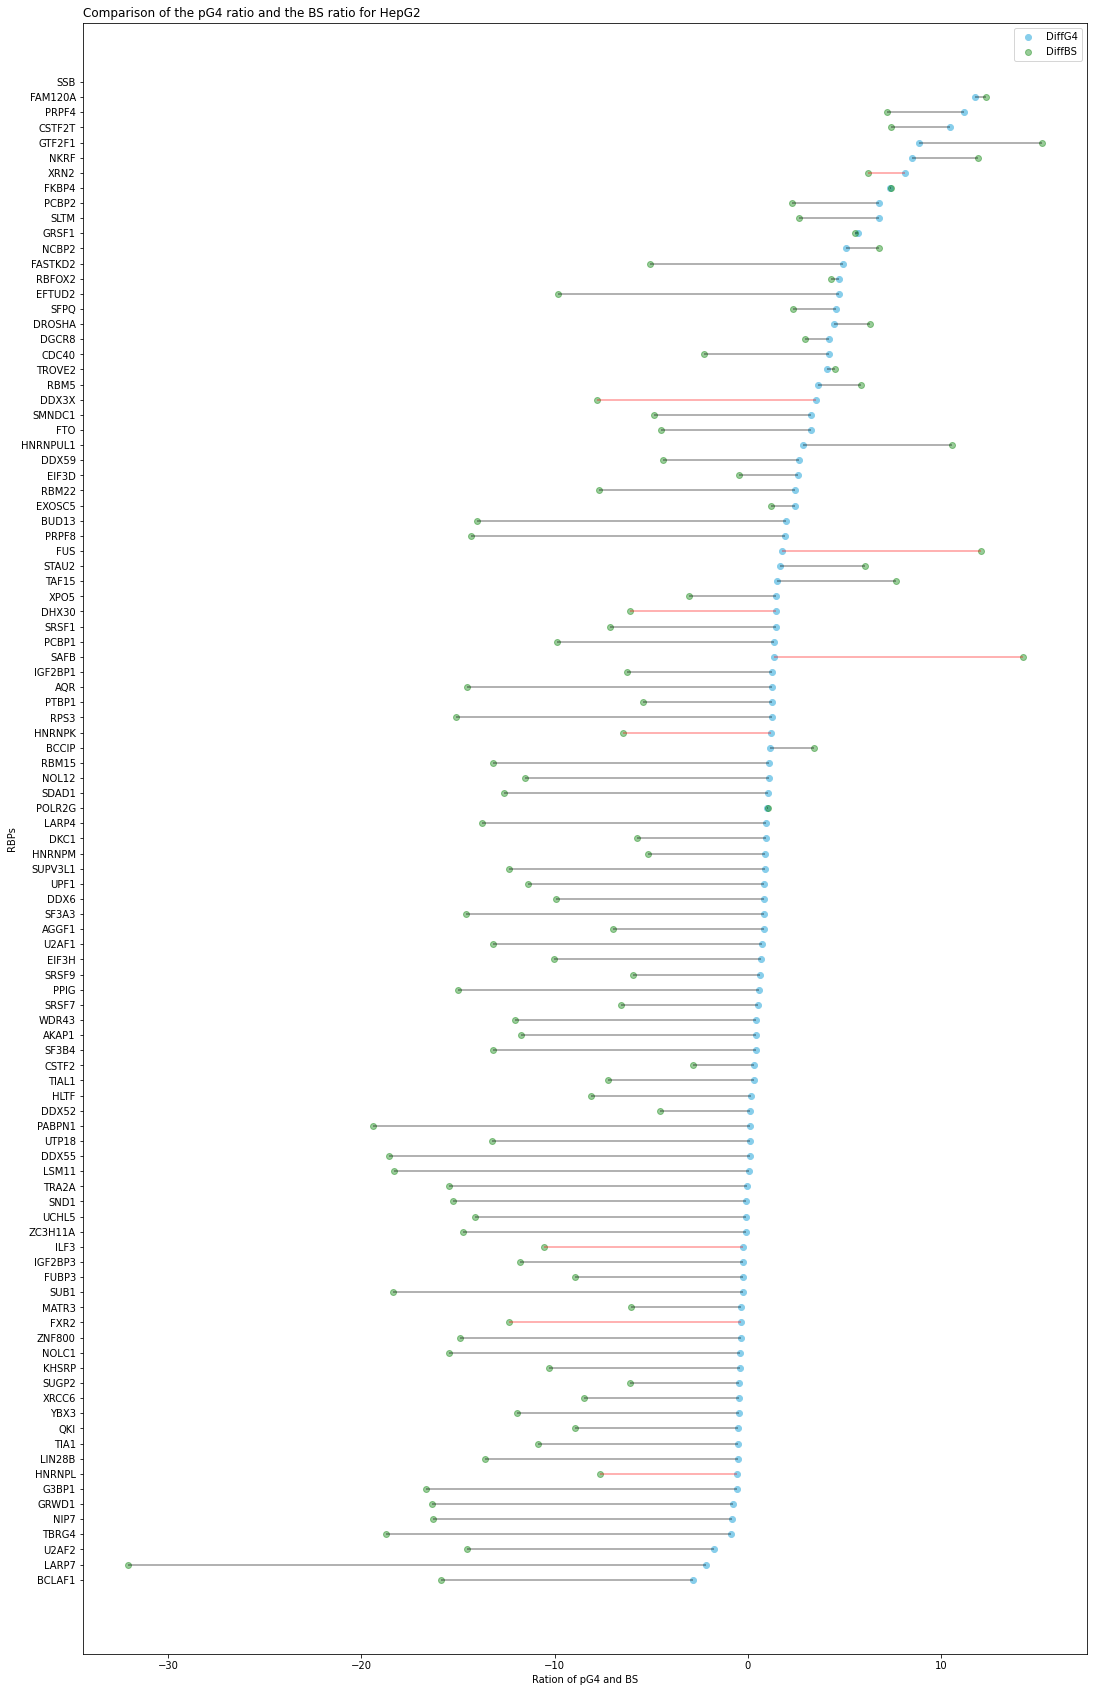

----------------K562----------------


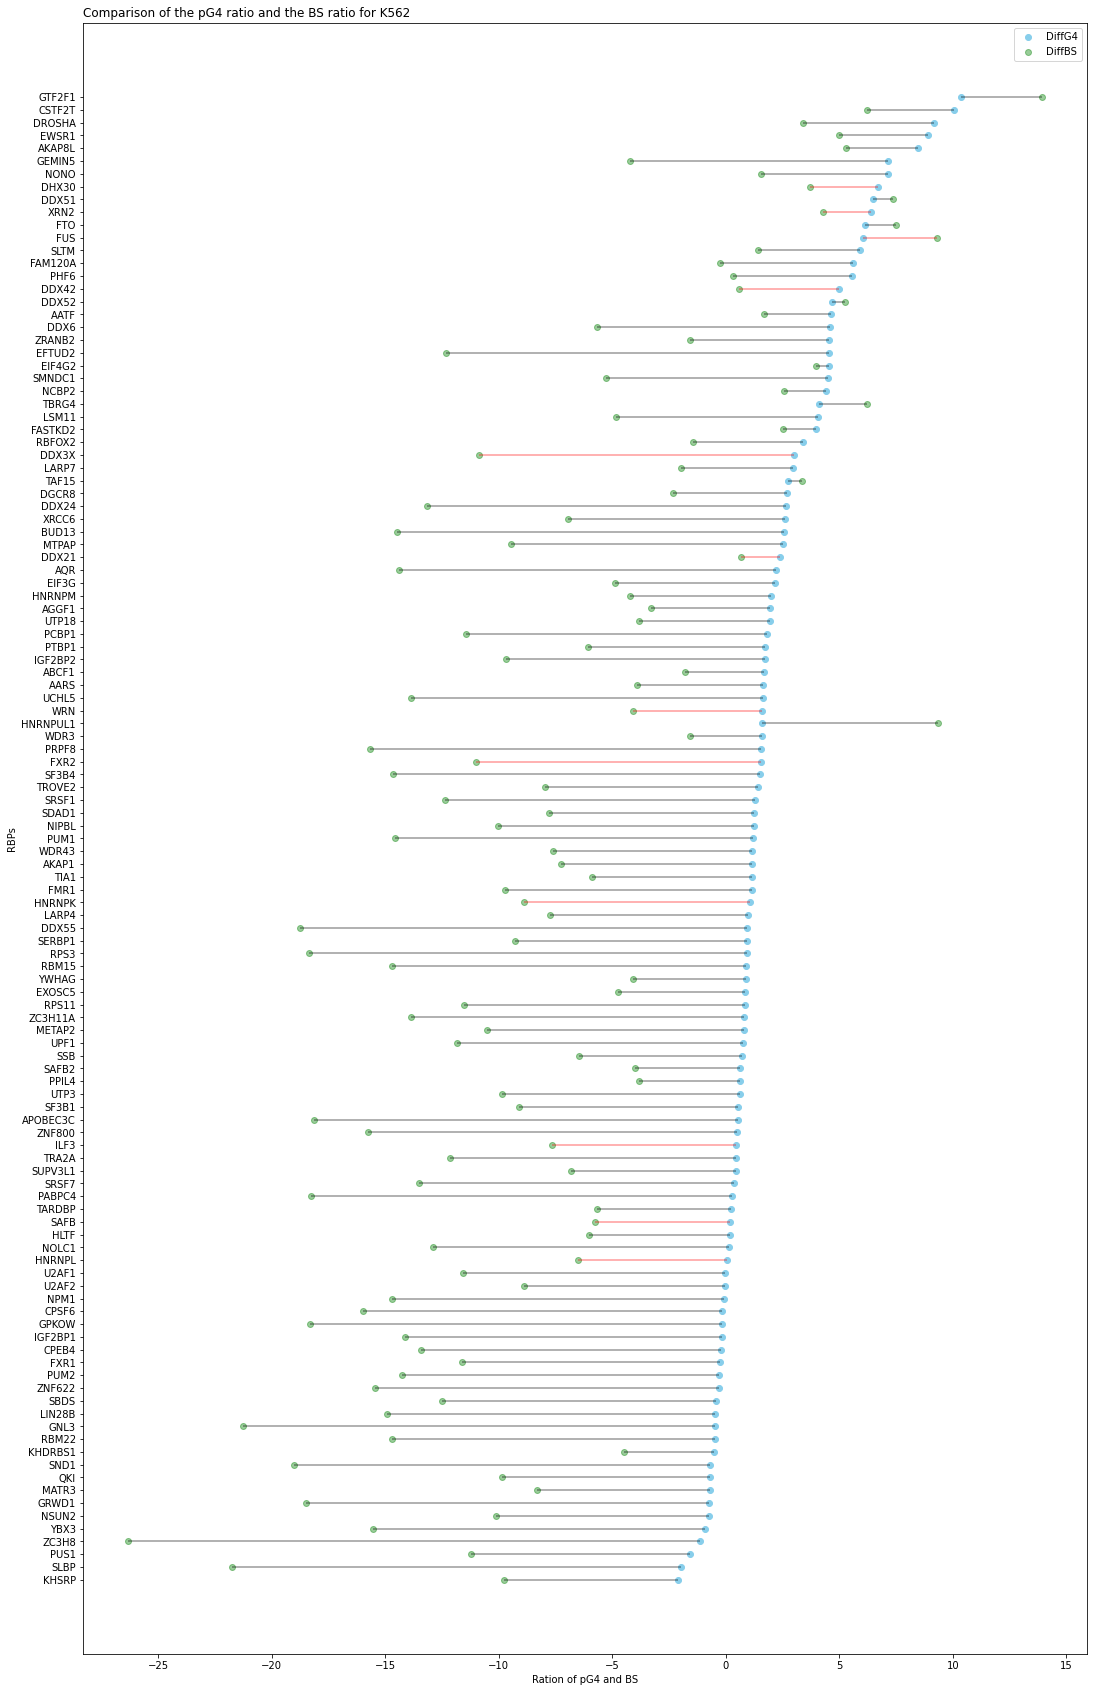

In [7]:
dfTot = pd.merge(dfStatBS,dfStatRandom, on=['cellLine','RBP'], how='outer')
dfTot['DiffG4'] = dfTot['RatioG4'] - dfTot['AvrRatioG4']
dfTot['DiffBS'] = dfTot['RatioBS'] - dfTot['AvrRatioBs']
dfTot

groupsRBP = dfTot.groupby(['cellLine'])
for name, groupRBP in groupsRBP:
    print('----------------'+name+'----------------')
    
    plt.figure(figsize=(18, 30))
    
    ordered_df = groupRBP.sort_values(by='DiffG4')
    my_range=range(1,len(groupRBP.index)+1)
    # The horizontal plot is made using the hline function
    plt.hlines(y=my_range, xmin=ordered_df['DiffG4'], xmax=ordered_df['DiffBS'], color=ordered_df['ColorKnownRBPBindingG4'], alpha=0.4)
    plt.scatter(ordered_df['DiffG4'], my_range, color='skyblue', alpha=1, label='DiffG4')
    plt.scatter(ordered_df['DiffBS'], my_range, color='green', alpha=0.4 , label='DiffBS')
    plt.legend()
    # Add title and axis names
    plt.yticks(my_range, ordered_df['RBP'])
    plt.title("Comparison of the pG4 ratio and the BS ratio for "+name, loc='left')
    plt.xlabel('Ration of pG4 and BS')
    plt.ylabel('RBPs')
    # Show the graph
    plt.savefig("/home/anais/Pictures/Article3/RBP/DoubleLolipopPlot_Diff_"+name+".svg")
    plt.show()

## Fig just common between the 2 cell lines

70


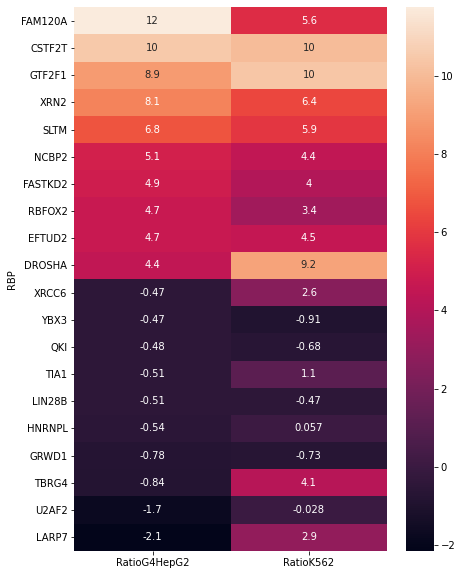

In [8]:
RBPHepG2 = dfTot[dfTot['cellLine'] == 'HepG2']['RBP']
RBPK562 = dfTot[dfTot['cellLine'] == 'K562']['RBP']
listCommonRBP = list(set(RBPHepG2) & set(RBPK562))
print(len(listCommonRBP))
dfCommon = pd.DataFrame().append(dfTot[dfTot['RBP'].isin(listCommonRBP)])
dfCommon.to_csv(path_or_buf='/home/anais/Documents/Projet/G4RBPevo/data/dfCommonRBPHeatmap.csv', header=True, index=True, sep='\t')
dfCommon = pd.read_csv('/home/anais/Documents/Projet/G4RBPevo/data/dfCommonRBPHeatmapParsed.tsv', sep='\t', index_col=0)
del dfCommon['RatioRBPK562']
del dfCommon['RatioRBPHepG2']
dfCommonFig = pd.DataFrame().append(dfCommon[dfCommon.RatioG4HepG2 >= 4.442])
dfCommonFig = dfCommonFig.append(dfCommon[dfCommon.RatioG4HepG2 <= -0.469])
dfCommonFig = dfCommonFig.sort_values('RatioG4HepG2',ascending = False)
plt.figure(figsize=(7, 10))
sns.heatmap(dfCommonFig, annot=True)
plt.savefig("/home/anais/Pictures/Article3/RBP/HeatmapHsap.svg")

# Other Sp results
A lot of codes was made in a python scripts and run on cedar using ;ultiprocess because it was too long with jupyter notebook (cf sctripts/SpCLIP.py and sbatch/SpCLIP.sh). 

----------------caenorhabditis_elegans----------------
----------------danio_rerio----------------
----------------drosophila_melanogaster----------------
----------------mus_musculus----------------
----------------saccharomyces_cerevisiae----------------


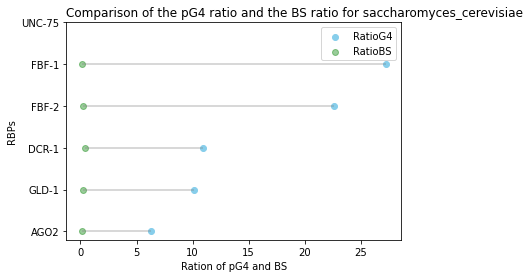

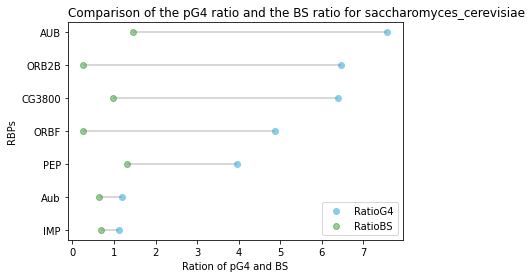

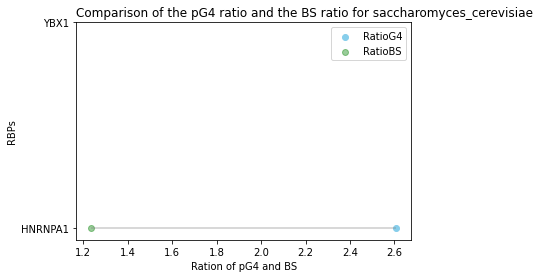

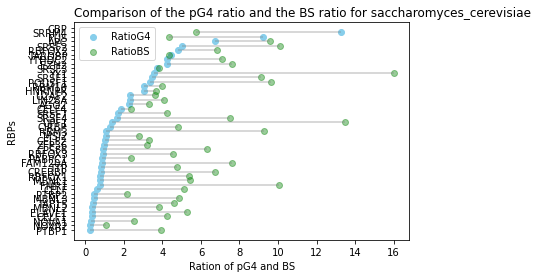

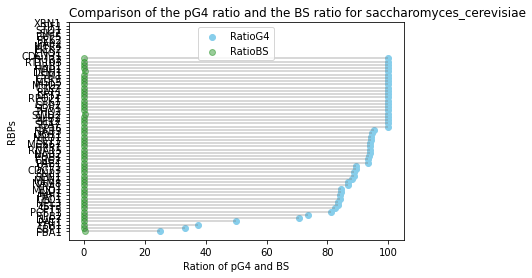

In [9]:
spList = ['caenorhabditis_elegans', 'danio_rerio', 'drosophila_melanogaster', 'mus_musculus', 'saccharomyces_cerevisiae']
directory = '/home/anais/Documents/Projet/G4RBPevo/data/POSTARTexcludedHuman/'
dfSpStatBS = pd.DataFrame()
for sp in spList:
    print('----------------'+sp+'----------------')
    dfTmp = pd.read_csv(directory+'resDf/dfStatBS_'+sp+'_resBeforeMergeSp.csv', sep=',')
    if sp == 'caenorhabditis_elegans':
        dfTmp['Sp'] = 'Cele'
    elif sp == 'danio_rerio':
        dfTmp['Sp'] = 'Drer'
    elif sp == 'drosophila_melanogaster':
        dfTmp['Sp'] = 'Dmel'
    elif sp == 'mus_musculus':
        dfTmp['Sp'] = 'Mmus'
    elif sp == 'saccharomyces_cerevisiae':
        dfTmp['Sp'] = 'Scer'
    dfSpStatBS = pd.concat([dfSpStatBS, dfTmp])

groupsRBP = dfSpStatBS.groupby(['Sp'])
for name, groupRBP in groupsRBP:    
    ordered_df = groupRBP.sort_values(by='RatioG4')
    my_range=range(1,len(groupRBP.index)+1)
    # The horizontal plot is made using the hline function
    plt.hlines(y=my_range, xmin=ordered_df['RatioG4'], xmax=ordered_df['RatioBS'], color='grey', alpha=0.4)
    plt.scatter(ordered_df['RatioG4'], my_range, color='skyblue', alpha=1, label='RatioG4')
    plt.scatter(ordered_df['RatioBS'], my_range, color='green', alpha=0.4 , label='RatioBS')
    plt.legend()
    # Add title and axis names
    plt.yticks(my_range, ordered_df['RBP'])
    plt.title("Comparison of the pG4 ratio and the BS ratio for "+sp, loc='left')
    plt.xlabel('Ration of pG4 and BS')
    plt.ylabel('RBPs')
    # Show the graph
    #     plt.savefig("/home/anais/Pictures/Article3/RBP/DoubleLolipopPlot_k562.svg")
    plt.show()

In [10]:
spList = ['Cele', 'Drer', 'Dmel', 'Mmus', 'Scer']
dfSpStatBSRandom = pd.DataFrame()

for sp in spList:
    for repro in [1,2,3,4,5,6,7,8,9,10]:
        try:
            dfTmp = pd.read_csv('/home/anais/Documents/Projet/G4RBPevo/data/POSTARTexcludedHuman/Repro_'+str(repro)+'_dfStatBS_'+sp+'_resBeforeMergeSp.csv', sep=',')
            dfTmp['Repro'] = repro
            dfTmp['Sp'] = sp
            dfSpStatBSRandom = pd.concat([dfSpStatBSRandom, dfTmp])
        except:
            print(sp, repro)

dicoSpAvrShuffle = {'Sp': [], 'RBP': [], 'AvrRatioG4': [], 'StdRatioG4': [], 'AvrRatioBs': [], 'StdRatioBs': [], }
groupsRBP = dfSpStatBSRandom.groupby(['RBP', 'Sp'])
for name, groupRBP in groupsRBP:
    dicoSpAvrShuffle['RBP'].append(name[0])
    dicoSpAvrShuffle['Sp'].append(name[1])
    dicoSpAvrShuffle['AvrRatioG4'].append(groupRBP['RatioG4'].mean())
    dicoSpAvrShuffle['StdRatioG4'].append(groupRBP['RatioG4'].std())
    dicoSpAvrShuffle['AvrRatioBs'].append(groupRBP['RatioBS'].mean())
    dicoSpAvrShuffle['StdRatioBs'].append(groupRBP['RatioBS'].std())
    
dfSpStatRandom = pd.DataFrame(data=dicoSpAvrShuffle)
dfSpStatRandom

Sp     RBP  AvrRatioG4  StdRatioG4  AvrRatioBs  StdRatioBs
0    Cele    AGO2   20.565188    1.450497    0.759486    0.055960
1    Mmus    AGO2    4.661189    0.036690   11.160056    0.125264
2    Mmus     APC    6.496111    0.042258   14.651019    0.113991
3    Dmel     AUB   37.746888    0.279797   16.338798    0.128819
4    Dmel     Aub   12.750469    0.530829   11.013072    0.377574
..    ...     ...         ...         ...         ...         ...
121  Scer    YRA1   89.375000    5.929271    0.068557    0.007952
122  Scer    YTH1   58.888889   10.540926    0.122891    0.031741
123  Mmus  YTHDC2    8.307309    0.044882   23.243331    0.099909
124  Mmus     YY1    3.715875    0.060092   25.786597    0.411191
125  Mmus   ZFP36    3.096011    0.036669   14.019941    0.212344

[126 rows x 6 columns]

In [11]:
dfTot = pd.merge(dfSpStatBS,dfSpStatRandom, on=['Sp','RBP'], how='outer')
dfTot['DiffG4'] = dfTot['RatioG4'] - dfTot['AvrRatioG4']
dfTot['DiffBS'] = dfTot['RatioBS'] - dfTot['AvrRatioBs']
dfTot

RBP    NbBS  NbBSG4  NbG4binded  NbG4tot   RatioBS     RatioG4    Sp  \
0     AGO2  103649   100.0        34.0    544.0  0.096479    6.250000  Cele   
1    DCR-1    7787    29.0        30.0    274.0  0.372416   10.948905  Cele   
2    FBF-1  206583   343.0       162.0    595.0  0.166035   27.226891  Cele   
3    FBF-2  199159   365.0       118.0    523.0  0.183271   22.562141  Cele   
4    GLD-1   21849    40.0        41.0    405.0  0.183075   10.123457  Cele   
..     ...     ...     ...         ...      ...       ...         ...   ...   
121   THO2   70714    72.0        17.0     17.0  0.101819  100.000000  Scer   
122   TIF1     160     NaN         NaN      NaN       NaN         NaN  Scer   
123   XRN1     647     NaN         NaN      NaN       NaN         NaN  Scer   
124   YRA1   62867    45.0        13.0     15.0  0.071580   86.666667  Scer   
125   YTH1    4801     5.0         3.0      8.0  0.104145   37.500000  Scer   

     AvrRatioG4  StdRatioG4  AvrRatioBs  StdRatioBs     DiffG4    DiffBS  
0     20.565188    1.450497    0.759486    0.055960 -14.315188 -0.663007  
1      9.027591    0.682451    0.336458    0.030147   1.921314  0.035957  
2     56.295238    1.120849    0.772668    0.020604 -29.068347 -0.606633  
3     54.823383    1.045964    0.858610    0.021670 -32.261241 -0.675340  
4     17.306065    0.974857    0.632523    0.038944  -7.182609 -0.449448  
..          ...         ...         ...         ...        ...       ...  
121   91.111111    3.884477    0.053596    0.006648   8.888889  0.048222  
122  100.000000    0.000000    0.625000    0.000000        NaN       NaN  
123   80.000000   17.213259    0.370943    0.079814        NaN       NaN  
124   89.375000    5.929271    0.068557    0.007952  -2.708333  0.003022  
125   58.888889   10.540926    0.122891    0.031741 -21.388889 -0.018746  

[126 rows x 14 columns]

----------------Cele----------------


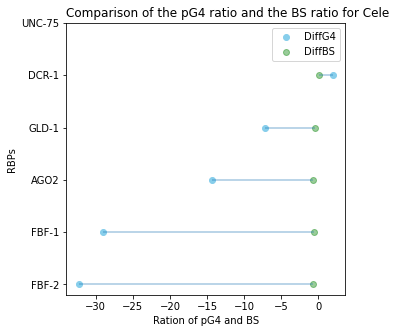

----------------Dmel----------------


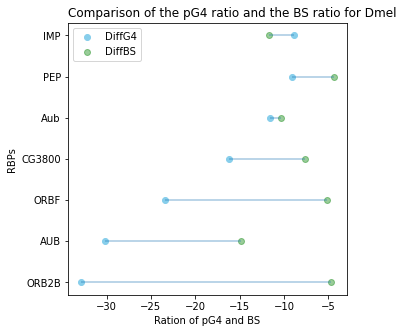

----------------Drer----------------


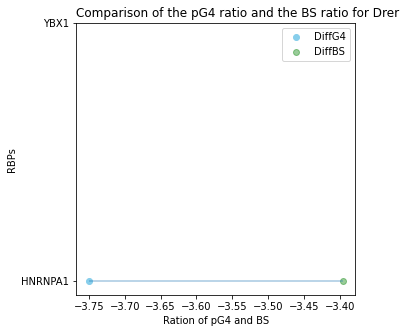

----------------Mmus----------------


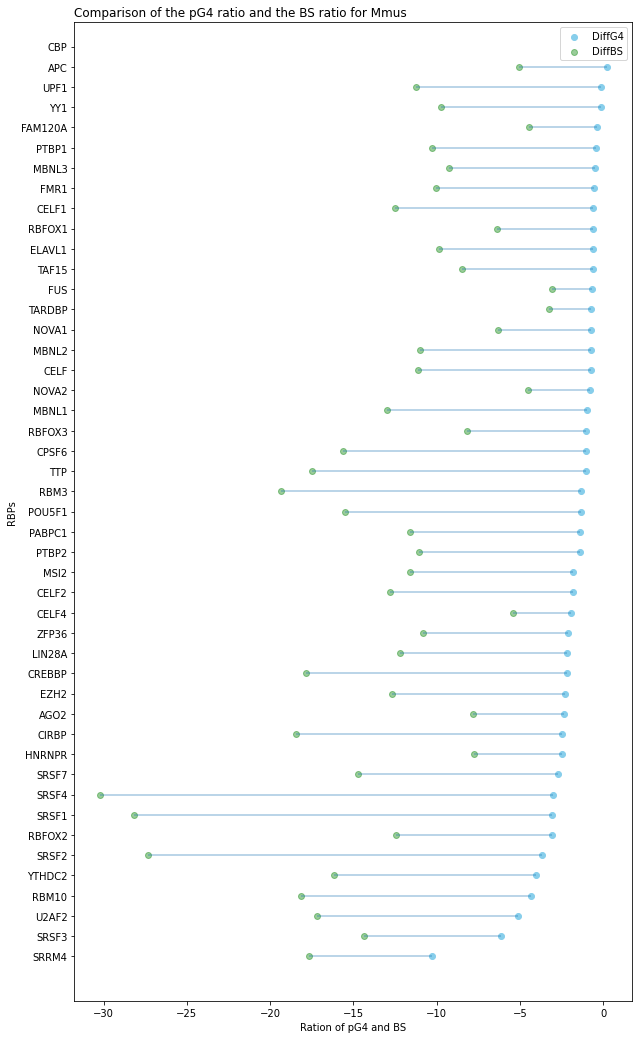

----------------Scer----------------


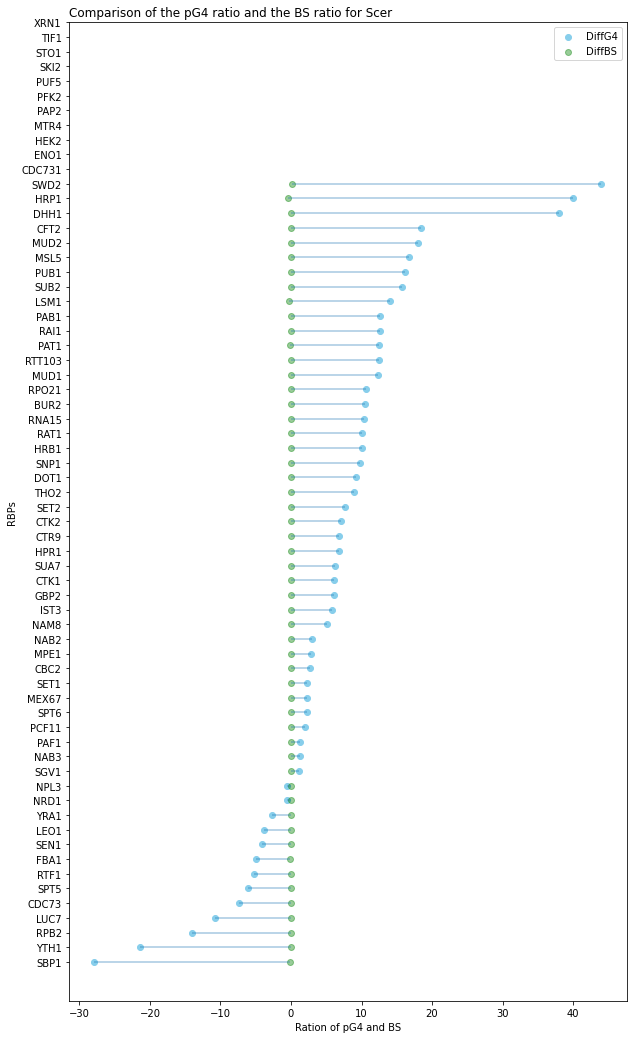

In [12]:
groupsRBP = dfTot.groupby(['Sp'])
for name, groupRBP in groupsRBP:
    print('----------------'+name+'----------------')
    
    if name in ['Scer', 'Mmus']:
        plt.figure(figsize=(10, 18))
    else:
        plt.figure(figsize=(5, 5))
    
    ordered_df = groupRBP.sort_values(by='DiffG4')
    my_range=range(1,len(groupRBP.index)+1)
    # The horizontal plot is made using the hline function
    plt.hlines(y=my_range, xmin=ordered_df['DiffG4'], xmax=ordered_df['DiffBS'], alpha=0.4)
    plt.scatter(ordered_df['DiffG4'], my_range, color='skyblue', alpha=1, label='DiffG4')
    plt.scatter(ordered_df['DiffBS'], my_range, color='green', alpha=0.4 , label='DiffBS')
    plt.legend()
    # Add title and axis names
    plt.yticks(my_range, ordered_df['RBP'])
    plt.title("Comparison of the pG4 ratio and the BS ratio for "+name, loc='left')
    plt.xlabel('Ration of pG4 and BS')
    plt.ylabel('RBPs')
    # Show the graph
    plt.savefig("/home/anais/Pictures/Article3/RBP/DoubleLolipopPlot_Diff_"+name+".svg")
    plt.show()

----------------Cele----------------
----------------Dmel----------------
----------------Drer----------------
----------------Mmus----------------
----------------Scer----------------


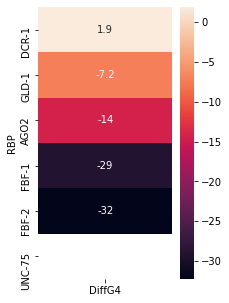

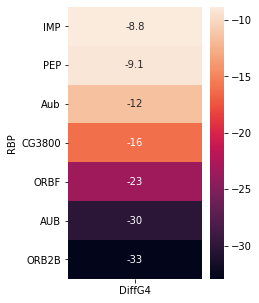

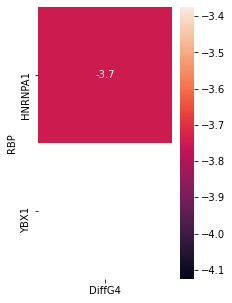

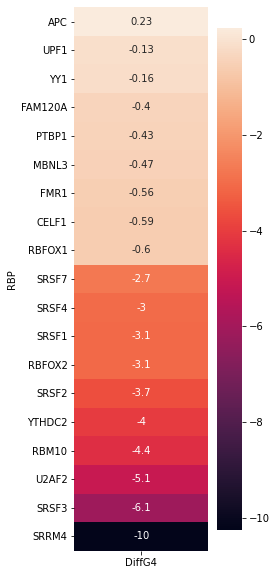

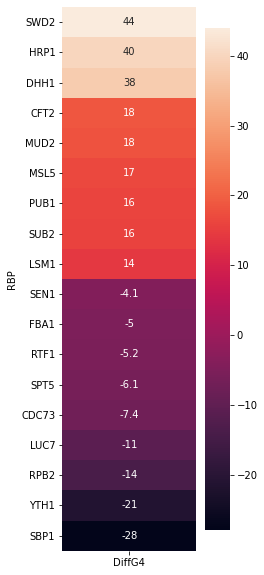

In [13]:
groupsRBP = dfTot.groupby(['Sp'])
for name, groupRBP in groupsRBP:
    print('----------------'+name+'----------------')
    dfCommonFig = pd.DataFrame().append(groupRBP).set_index('RBP')
#     print(dfCommonFig)
    del dfCommonFig['NbBS']
    del dfCommonFig['NbBSG4']
    del dfCommonFig['NbG4binded']
    del dfCommonFig['NbG4tot']
    del dfCommonFig['RatioBS']
    del dfCommonFig['RatioG4']
    del dfCommonFig['Sp']
    del dfCommonFig['StdRatioG4']
    del dfCommonFig['AvrRatioBs']
    del dfCommonFig['AvrRatioG4']
    del dfCommonFig['StdRatioBs']
    del dfCommonFig['DiffBS']
#     print(dfCommonFig)
    
    if name in ['Cele', 'Dmel', 'Drer']:
        plt.figure(figsize=(3, 5))
    elif name == 'Scer':
        plt.figure(figsize=(3, 10))
        dfTmp = pd.DataFrame().append(dfCommonFig)
        dfCommonFig = pd.DataFrame().append(dfTmp[dfTmp.DiffG4 >= 13])
        dfCommonFig = dfCommonFig.append(dfTmp[dfTmp.DiffG4 <= -3.8])
    elif name == 'Mmus':
        plt.figure(figsize=(3, 10))
        dfTmp = pd.DataFrame().append(dfCommonFig)
        dfCommonFig = pd.DataFrame().append(dfTmp[dfTmp.DiffG4 >= -0.61])
        dfCommonFig = dfCommonFig.append(dfTmp[dfTmp.DiffG4 <= -2.7])
        
    dfCommonFig = dfCommonFig.sort_values('DiffG4',ascending = False)
    sns.heatmap(dfCommonFig, annot=True)
    plt.savefig("/home/anais/Pictures/Article3/RBP/HeatmapHsap_"+name+".svg")

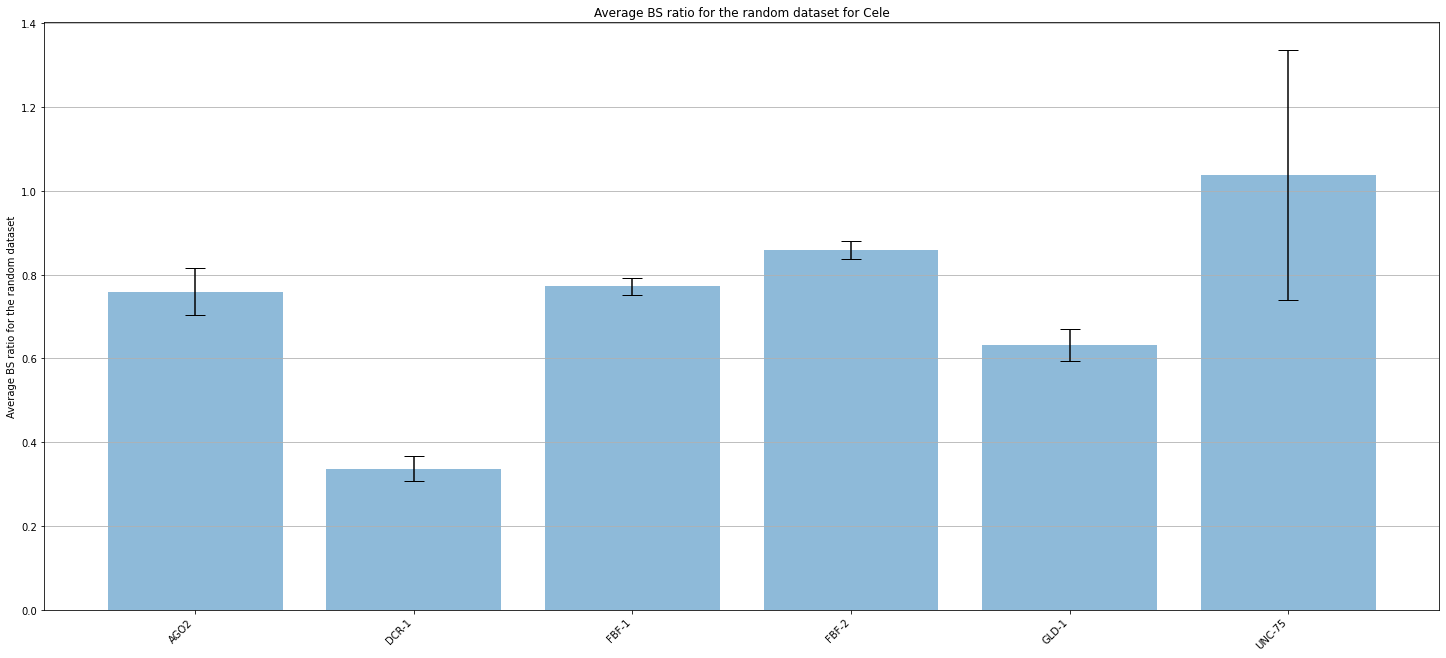

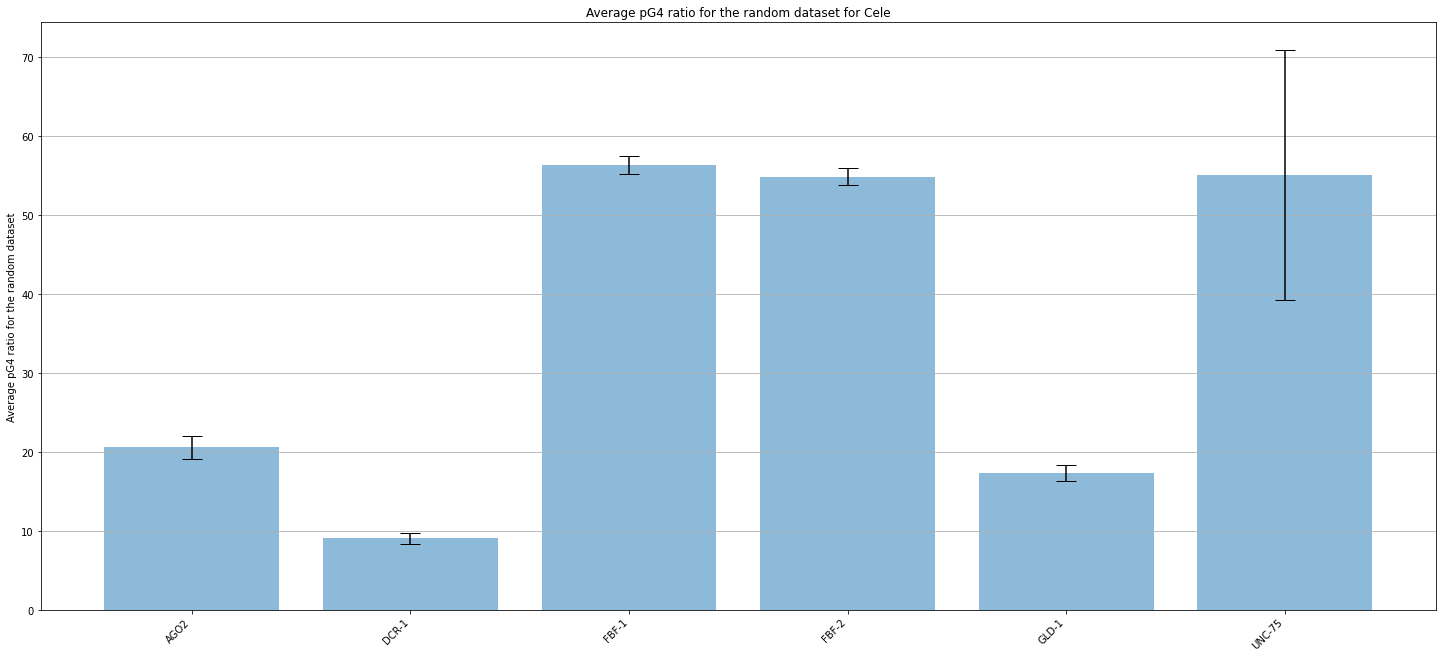

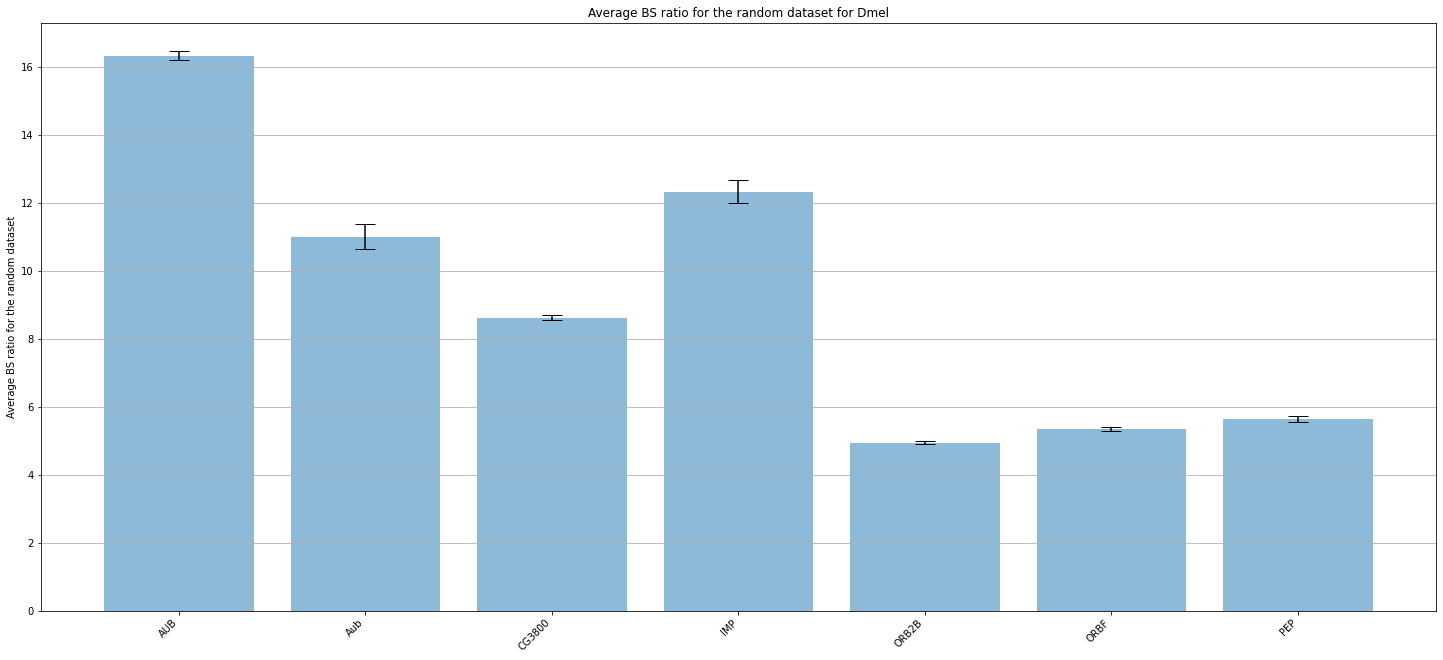

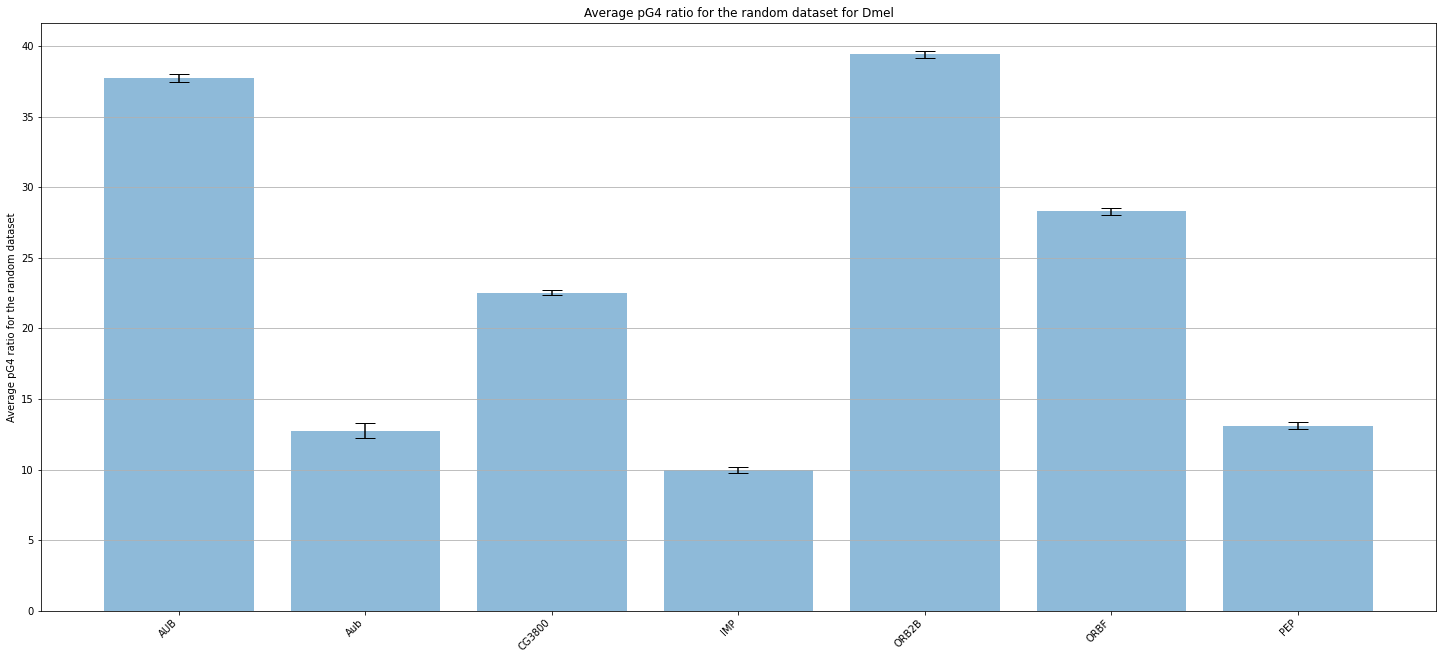

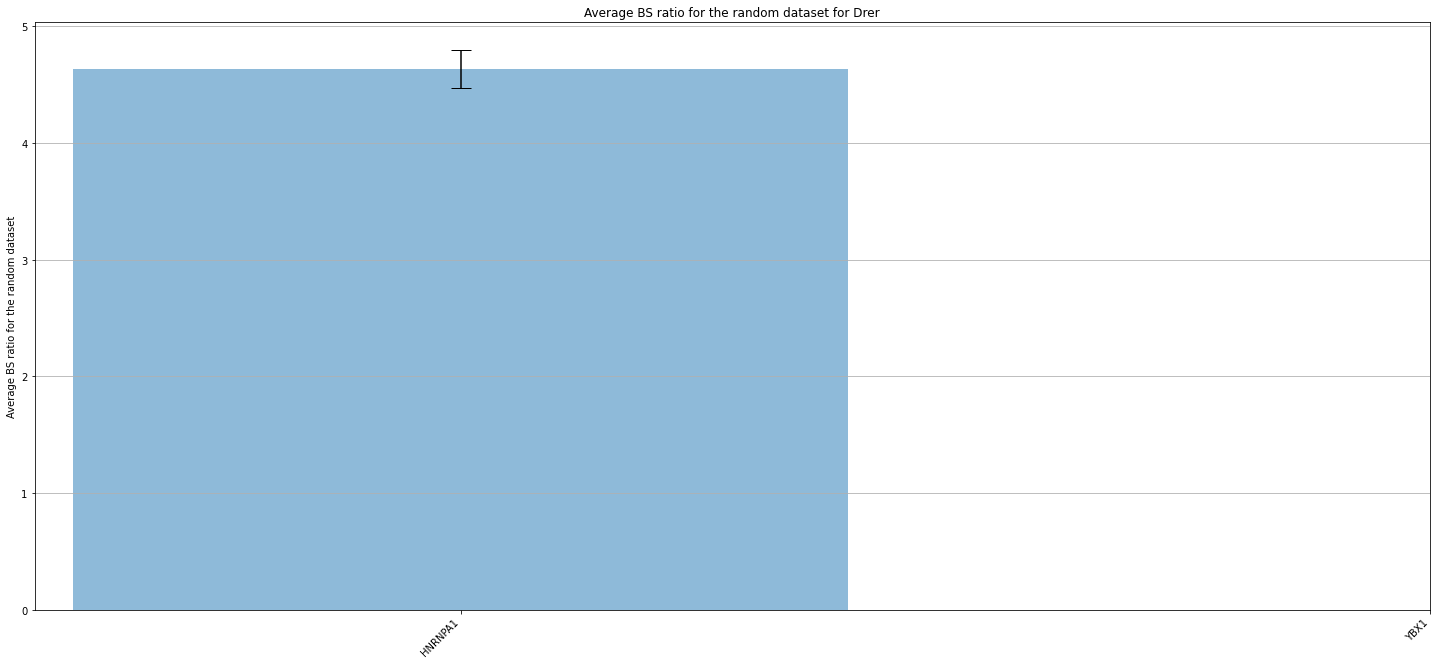

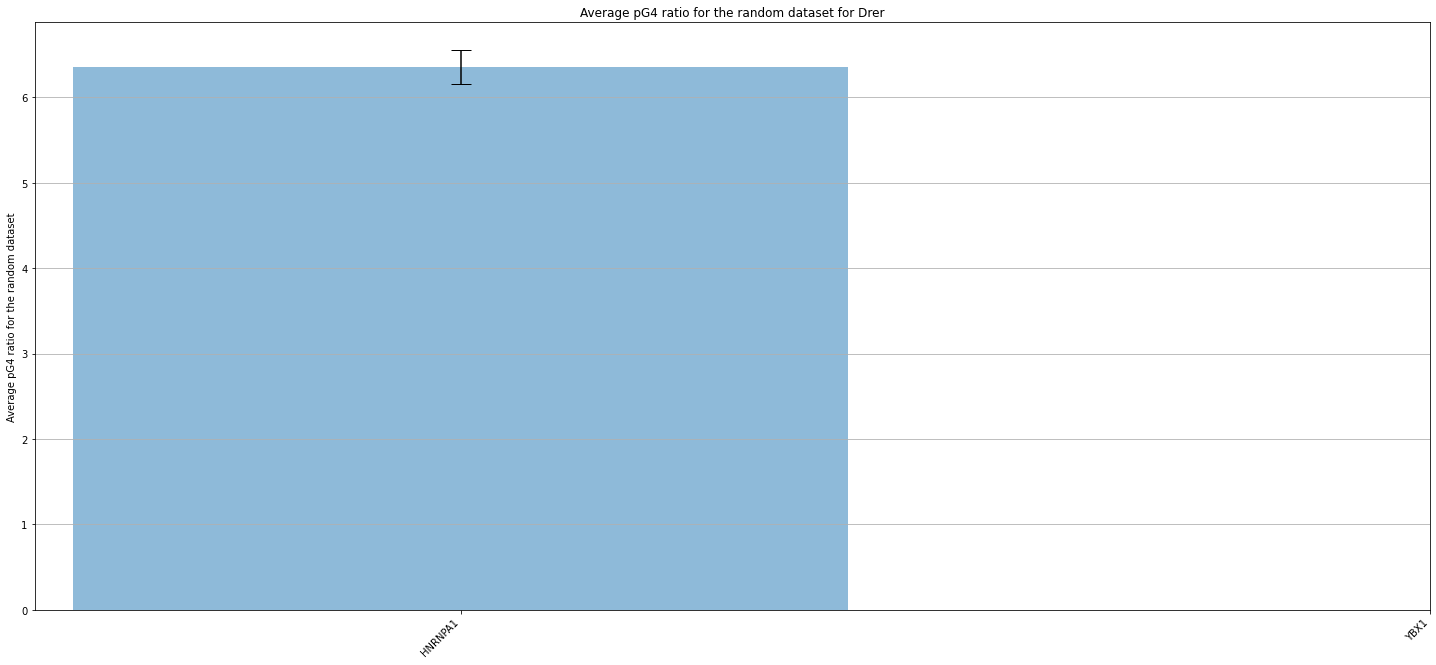

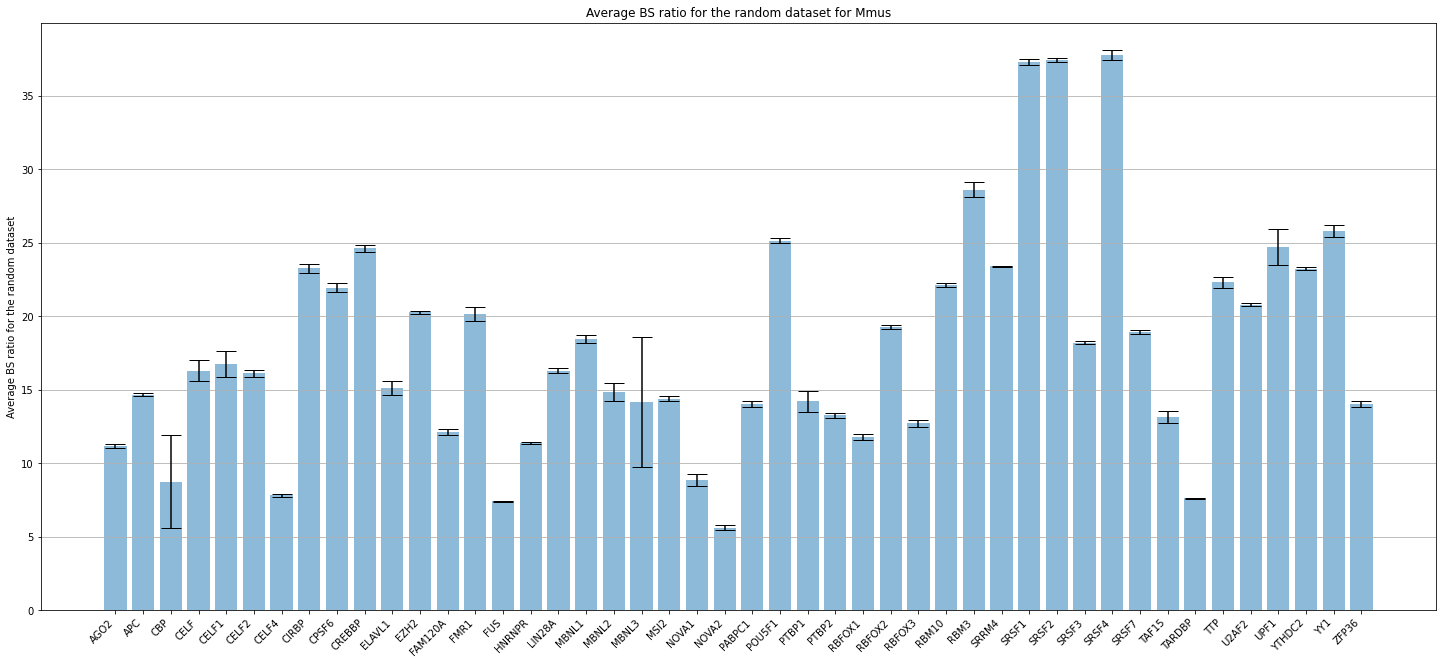

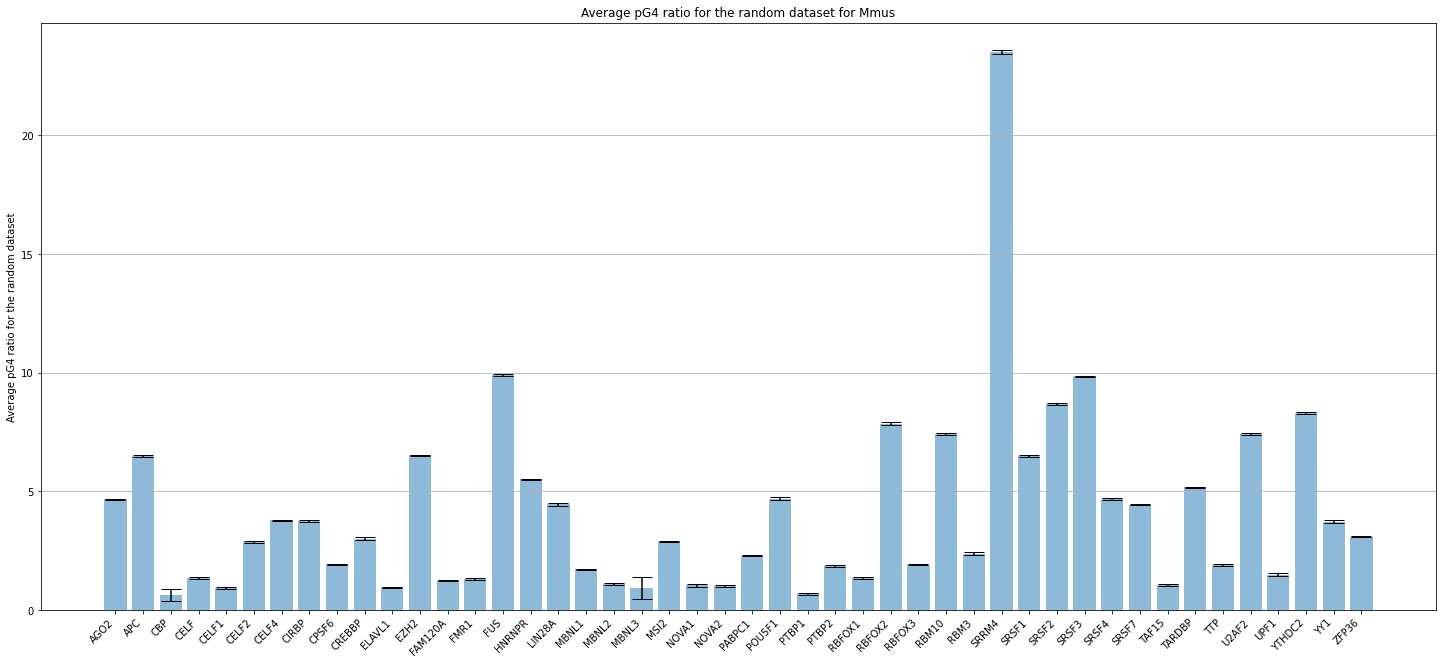

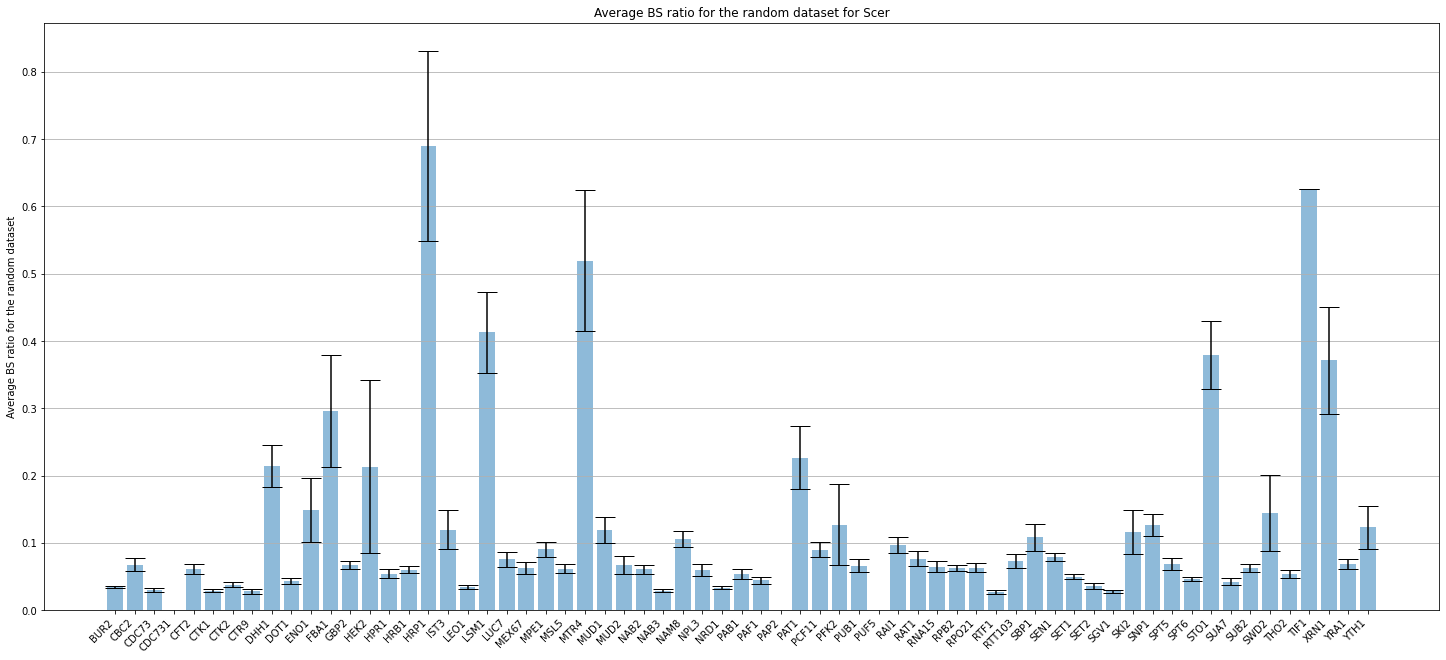

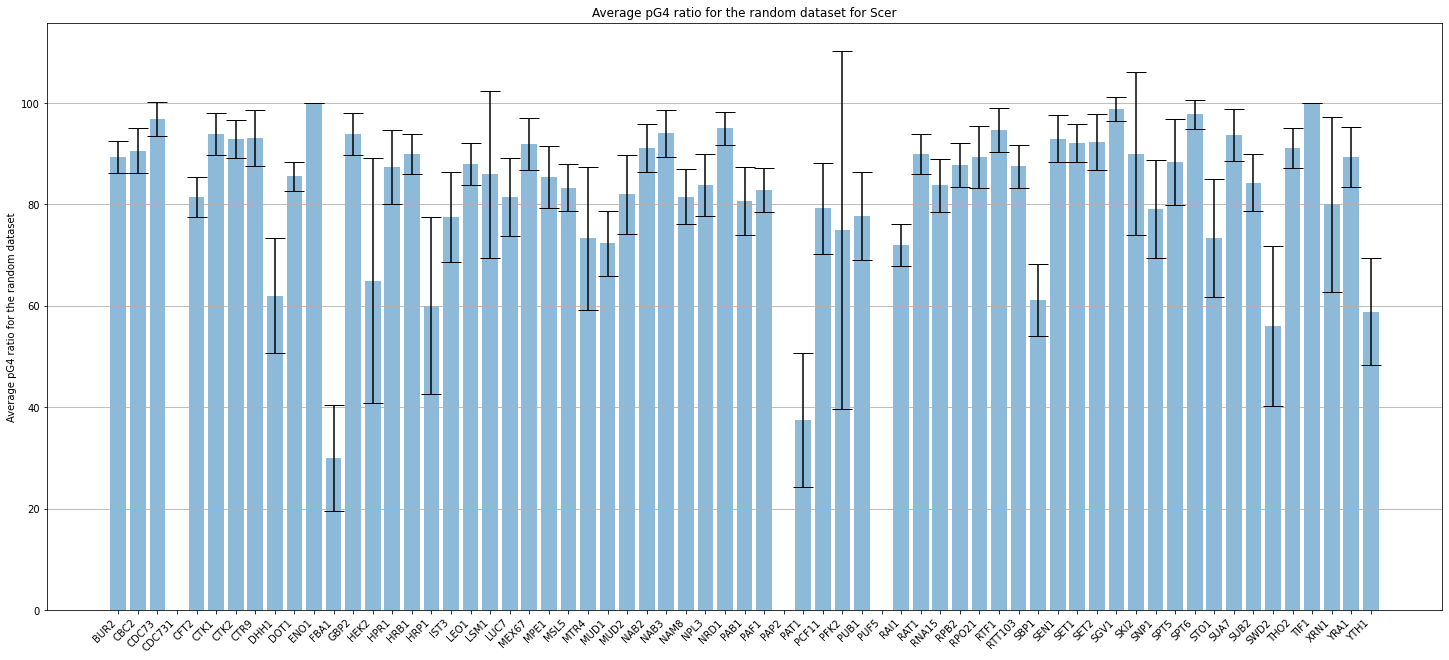

In [14]:
groupsSp = dfSpStatRandom.groupby('Sp')
for name, group in groupsSp:
    # Create lists for the plot
    sp = list(group.RBP)
    x_pos = np.arange(len(group.RBP))
    CTEs = list(group.AvrRatioBs)
    error = list(group.StdRatioBs)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(25, 12)
    ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.set_ylabel('Average BS ratio for the random dataset')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(sp)
    fig.autofmt_xdate(rotation=45)
#     ax.set_ylim([0, 18])
    ax.set_title('Average BS ratio for the random dataset for '+name)
    ax.yaxis.grid(True)

    # Save the figure and show
    #plt.tight_layout()
    plt.savefig('/home/anais/Pictures/Article3/RBP/Repro_BSRatio_'+name+'_plot_with_error_bars.svg')
    plt.show()
    
    
    
    x_pos = np.arange(len(group.RBP))
    CTEs = list(group.AvrRatioG4)
    error = list(group.StdRatioG4)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(25, 12)
    ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.set_ylabel('Average pG4 ratio for the random dataset')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(sp)
    fig.autofmt_xdate(rotation=45)
#     ax.set_ylim([0, 145])
    ax.set_title('Average pG4 ratio for the random dataset for '+name)
    ax.yaxis.grid(True)

    # Save the figure and show
    #plt.tight_layout()
    plt.savefig('/home/anais/Pictures/Article3/RBP/Repro_G4Ratio_'+name+'_plot_with_error_bars.svg')
    plt.show()

# Varia

In [15]:
dfSpStatRandom[dfSpStatRandom.AvrRatioG4 > 100]

Empty DataFrame
Columns: [Sp, RBP, AvrRatioG4, StdRatioG4, AvrRatioBs, StdRatioBs]
Index: []

In [16]:
listHsap = list(set(dfStatBS['RBP']))
listScer = list(set(dfSpStatRandom[dfSpStatRandom.Sp == 'Scer']['RBP']))
listMmus = list(set(dfSpStatRandom[dfSpStatRandom.Sp == 'Mmus']['RBP']))
listCele = list(set(dfSpStatRandom[dfSpStatRandom.Sp == 'Cele']['RBP']))
listDmel = list(set(dfSpStatRandom[dfSpStatRandom.Sp == 'Dmel']['RBP']))
listDrer = list(set(dfSpStatRandom[dfSpStatRandom.Sp == 'Drer']['RBP']))

print('Common RBPs between Hsap and Scer :')
print('\t'+', '.join(list(set(set(listHsap) & set(listScer)))))
print('Common RBPs between Hsap and Mmus :')
print('\t'+', '.join(list(set(set(listHsap) & set(listMmus)))))
print('Common RBPs between Hsap and Cele :')
print('\t'+', '.join(list(set(set(listHsap) & set(listCele)))))
print('Common RBPs between Hsap and Dmel :')
print('\t'+', '.join(list(set(set(listHsap) & set(listDmel)))))
print('Common RBPs between Hsap and Drer :')
print('\t'+', '.join(list(set(set(listHsap) & set(listDrer)))))
print('Common RBPs between Scer and Mmus :')
print('\t'+', '.join(list(set(set(listScer) & set(listMmus)))))
print('Common RBPs between Scer and Cele :')
print('\t'+', '.join(list(set(set(listScer) & set(listCele)))))
print('Common RBPs between Scer and Dmel :')
print('\t'+', '.join(list(set(set(listScer) & set(listDmel)))))
print('Common RBPs between Scer and Drer :')
print('\t'+', '.join(list(set(set(listScer) & set(listDrer)))))
print('Common RBPs between Mmus and Cele :')
print('\t'+', '.join(list(set(set(listMmus) & set(listCele)))))
print('Common RBPs between Mmus and Dmel :')
print('\t'+', '.join(list(set(set(listMmus) & set(listDmel)))))
print('Common RBPs between Mmus and Drer :')
print('\t'+', '.join(list(set(set(listMmus) & set(listDrer)))))
print('Common RBPs between Cele and Dmel :')
print('\t'+', '.join(list(set(set(listCele) & set(listDmel)))))
print('Common RBPs between Cele and Drer :')
print('\t'+', '.join(list(set(set(listCele) & set(listDrer)))))
print('Common RBPs between Dmel and Drer :')
print('\t'+', '.join(list(set(set(listDmel) & set(listDrer)))))

Common RBPs between Hsap and Scer :
	
Common RBPs between Hsap and Mmus :
	RBFOX2, FMR1, TAF15, U2AF2, PTBP1, SRSF1, CPSF6, SRSF7, FAM120A, FUS, TARDBP, UPF1
Common RBPs between Hsap and Cele :
	
Common RBPs between Hsap and Dmel :
	
Common RBPs between Hsap and Drer :
	
Common RBPs between Scer and Mmus :
	
Common RBPs between Scer and Cele :
	
Common RBPs between Scer and Dmel :
	
Common RBPs between Scer and Drer :
	
Common RBPs between Mmus and Cele :
	AGO2
Common RBPs between Mmus and Dmel :
	
Common RBPs between Mmus and Drer :
	
Common RBPs between Cele and Dmel :
	
Common RBPs between Cele and Drer :
	
Common RBPs between Dmel and Drer :
	


In [17]:
dfTot[dfTot.RBP == 'CDC73']

RBP    NbBS  NbBSG4  NbG4binded  NbG4tot   RatioBS    RatioG4    Sp  \
63  CDC73  151159    66.0        17.0     19.0  0.043663  89.473684  Scer   

    AvrRatioG4  StdRatioG4  AvrRatioBs  StdRatioBs    DiffG4    DiffBS  
63      96.875    3.294039    0.030432    0.002807 -7.401316  0.013231